## Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sn

In [2]:
x = pd.read_csv('data/train.csv')

In [3]:
x.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [4]:
x.shape

(10000, 20)

### 1. Посчитать основные статистики по каждому признаку (минимальные, максимальные, средние значения). Сделать выводы об адекватности этих статистик.

In [5]:
x.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

### Выводы об основных статистиках признаков

#### Id - идентификационный номер квартиры
Предположение: данный признак не обладает полезной информацией для анализа, но может потребоваться в дальнейшем, поэтому не будет удалён.

Данные не имеют пропусков.

Тип данных признака в дальнейшем может быть оптимизирован с целью уменьшения потребления памяти.

#### DistrictId - идентификационный номер района
Предположение: данный признак может быть полезен, так как пристиж района может оказывать влияние на стоимость аппартаментов.

Данные не имеют пропусков.

Данные и их статистики выглядят адекватными, за исключением значения "0". Возможно это ошибка, возможно это реальный идентификатор района. В дальнейшем потребуется оценить долю значений "0" от общего числа, однако методика замены этих значений неочевидна. Возможно лучше будет ничего не делать с этими значениями.

Тип данных признака в дальнейшем может быть оптимизирован с целью уменьшения потребления памяти.

#### Rooms - количество комнат
Преположение: данный признак точно будет оказывать влияние на целевой признак.

Данные не имеют пропусков.

Данные и их статистики выглядят адекватными, за исключением значения "0". Возможно это ошибка, возможно это обозначение студии. В дальшейнем нужно будет оценить долю значений от общего числа, доля может быть пренебрежима мала. Также площадь квартиры должна подсказать наличие ошибки в этом признаке.
Тип данных "float64" свидетельствует о том, что в массиве данных содержатся ошибки: количество комнат должно быть целочисленной величиной.

Тип данных признака в дальнейшем может быть оптимизирован с целью уменьшения потребления памяти.

#### Square - площадь
Преположение: данный признак точно будет оказывать влияние на целевую переменную.

Данные не имеют пропусков.

Минимальное значение признака чуть более 1 квадратного метра, что синализирует о наличии ошибок заполнения в этом признаке.

Тип данных признака в дальнейшем может быть оптимизирован с целью уменьшения потребления памяти.

#### LifeSquare - жилая площадь
Данные имеют значительные пропуски, более 20%!

Предположение: данный признак может оказывать влияние на целевую переменную, поэтому потребуется его заполнение. Возможно признак получится вычислить на основании среднего соотношения жилой площади ко всей площади в тех случаях, где жилая площадь заполнена.

Минимальные и максимальные значения признака выглядят неадекватно, потребуется обработка.

Тип данных признака в дальнейшем может быть оптимизирован с целью уменьшения потребления памяти.

#### KitchenSquare - площадь кухни
Предположение: данный признак может оказывать влияние на целевую переменную.

Данные не имеют пропусков.

Минимальные и максимальные значения признака выглядят неадекватно, потребуется обработка.

Тип данных признака в дальнейшем может быть оптимизирован с целью уменьшения потребления памяти.

#### Floor - этаж
Преположение: данный признак точно будет оказывать влияние на целевую переменную.

Данные не имеют пропусков.

Данные и их статистики выглядят адекватными.

Тип данных признака в дальнейшем может быть оптимизирован с целью уменьшения потребления памяти.

#### HouseFloor - количество этажей в доме
Предположение: данный признак может оказывать влияние на целевую переменную.

Данные не имеют пропусков.

Минимальные и возможно максимальные значения признака выглядят неадекватно, потребуется обработка.
Тип данных "float64" свидетельствует о том, что в массиве данных содержатся ошибки: количество этажей в доме должно быть целочисленной величиной.

Тип данных признака в дальнейшем может быть оптимизирован с целью уменьшения потребления памяти.

#### HouseYear - год постройки дома
Преположение: данный признак точно будет оказывать влияние на целевую переменную.

Данные не имеют пропусков.

Данные выглядят закодированными на подобии записи даты постройки дома в виде целого числа.

Возможно в дальнейшем получится преобразовать данные и оптимизовать их тип.

#### Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
Данные похожи на вычисленные коэффициенты. Статистики данных не свидетельствуют о наличии выбросов, но оценить адекватность данных не представляется возможным. Возможно потребуются дополнительная проверка с исключением данного признака.

Признаки "Ecology_2" и "Ecology_3" явлаются категориальными. В данный момент их оценка невозможна, потребуется конвертация в dummy признаки.

Данные не имеют пропусков.

#### Social_1, Social_2, Social_3 - социальные показатели местности
Данные также похожи на вычисленные коэффициенты. Статистики данных свидетельствуют, что возможны выбросы, но оценить адекватность данных не представляется возможным. Возможно потребуются дополнительная проверка с исключением данного признака.

Данные не имеют пропусков.

#### Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
Признак "Healthcare_1" содержит значительное количество пропусков, чуть мене 50%. Данное количество пропусков, а также неочевидная природа происхождения признака не позволяют произвести генерацию пропущенных значений. Таким образом, данный признак вероятно разумнее будет исключить.

Признак "Helthcare_2" не содержит пропусков, но оценить его адекватность не представляется возможным. Возможно потребуются дополнительная проверка с исключением данного признака.

#### Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
Оценить адекватность признака "Shops_1" не представляется возможным. Возможно потребуются дополнительная проверка с исключением данного признака.

Признак "Shops_2" явлаются категориальным. В данный момент его оценка невозможна, потребуется конвертация в dummy признаки.

Данные не имеют пропусков.

#### Price - цена квартиры
Целевой признак. Статистики данных выглядят адеватно.

Данные не имеют пропусков.

### 2. Посчитать для каждого признака, сколько в нем уникальных значений и как часто они встречаются. Сделать выводы по каждому признаку.

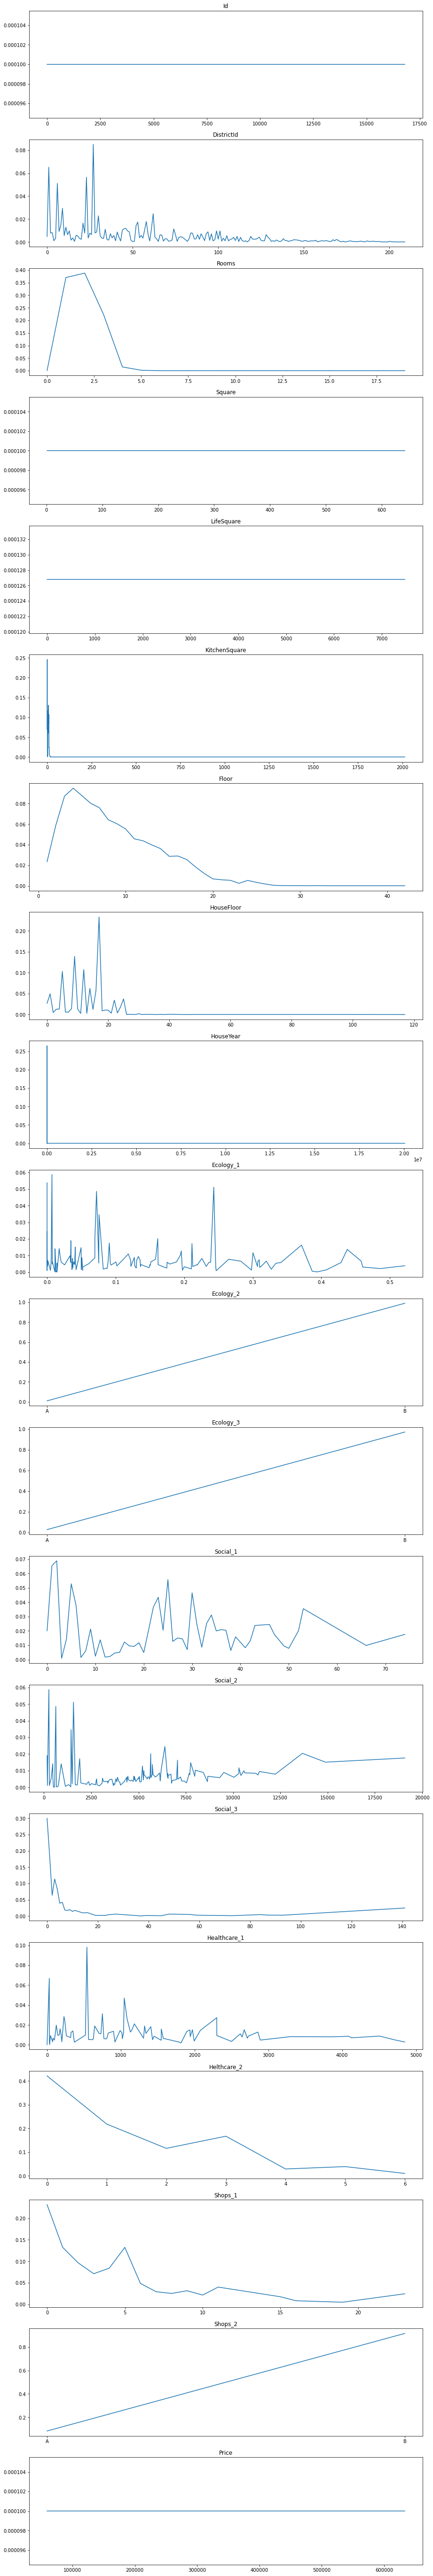

In [7]:
# Построение графиков распределения величин признаков

fig, ax = plt.subplots(nrows = 20, ncols = 1)

ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18, ax19 = ax.flatten()

ax0.plot(x['Id'].value_counts(normalize = True).sort_index())
ax0.set_title('Id')

ax1.plot(x['DistrictId'].value_counts(normalize = True).sort_index())
ax1.set_title('DistrictId')

ax2.plot(x['Rooms'].value_counts(normalize = True).sort_index())
ax2.set_title('Rooms')

ax3.plot(x['Square'].value_counts(normalize = True).sort_index())
ax3.set_title('Square')

ax4.plot(x['LifeSquare'].value_counts(normalize = True).sort_index())
ax4.set_title('LifeSquare')

ax5.plot(x['KitchenSquare'].value_counts(normalize = True).sort_index())
ax5.set_title('KitchenSquare')

ax6.plot(x['Floor'].value_counts(normalize = True).sort_index())
ax6.set_title('Floor')

ax7.plot(x['HouseFloor'].value_counts(normalize = True).sort_index())
ax7.set_title('HouseFloor')

ax8.plot(x['HouseYear'].value_counts(normalize = True).sort_index())
ax8.set_title('HouseYear')

ax9.plot(x['Ecology_1'].value_counts(normalize = True).sort_index())
ax9.set_title('Ecology_1')

ax10.plot(x['Ecology_2'].value_counts(normalize = True).sort_index())
ax10.set_title('Ecology_2')

ax11.plot(x['Ecology_3'].value_counts(normalize = True).sort_index())
ax11.set_title('Ecology_3')

ax12.plot(x['Social_1'].value_counts(normalize = True).sort_index())
ax12.set_title('Social_1')

ax13.plot(x['Social_2'].value_counts(normalize = True).sort_index())
ax13.set_title('Social_2')

ax14.plot(x['Social_3'].value_counts(normalize = True).sort_index())
ax14.set_title('Social_3')

ax15.plot(x['Healthcare_1'].value_counts(normalize = True).sort_index())
ax15.set_title('Healthcare_1')

ax16.plot(x['Helthcare_2'].value_counts(normalize = True).sort_index())
ax16.set_title('Helthcare_2')

ax17.plot(x['Shops_1'].value_counts(normalize = True).sort_index())
ax17.set_title('Shops_1')

ax18.plot(x['Shops_2'].value_counts(normalize = True).sort_index())
ax18.set_title('Shops_2')

ax19.plot(x['Price'].value_counts(normalize = True).sort_index())
ax19.set_title('Price')

fig.set_size_inches(15, 100)

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'DistrictId'}>,
        <AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Square'}>],
       [<AxesSubplot:title={'center':'LifeSquare'}>,
        <AxesSubplot:title={'center':'KitchenSquare'}>,
        <AxesSubplot:title={'center':'Floor'}>,
        <AxesSubplot:title={'center':'HouseFloor'}>],
       [<AxesSubplot:title={'center':'HouseYear'}>,
        <AxesSubplot:title={'center':'Ecology_1'}>,
        <AxesSubplot:title={'center':'Social_1'}>,
        <AxesSubplot:title={'center':'Social_2'}>],
       [<AxesSubplot:title={'center':'Social_3'}>,
        <AxesSubplot:title={'center':'Healthcare_1'}>,
        <AxesSubplot:title={'center':'Helthcare_2'}>,
        <AxesSubplot:title={'center':'Shops_1'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

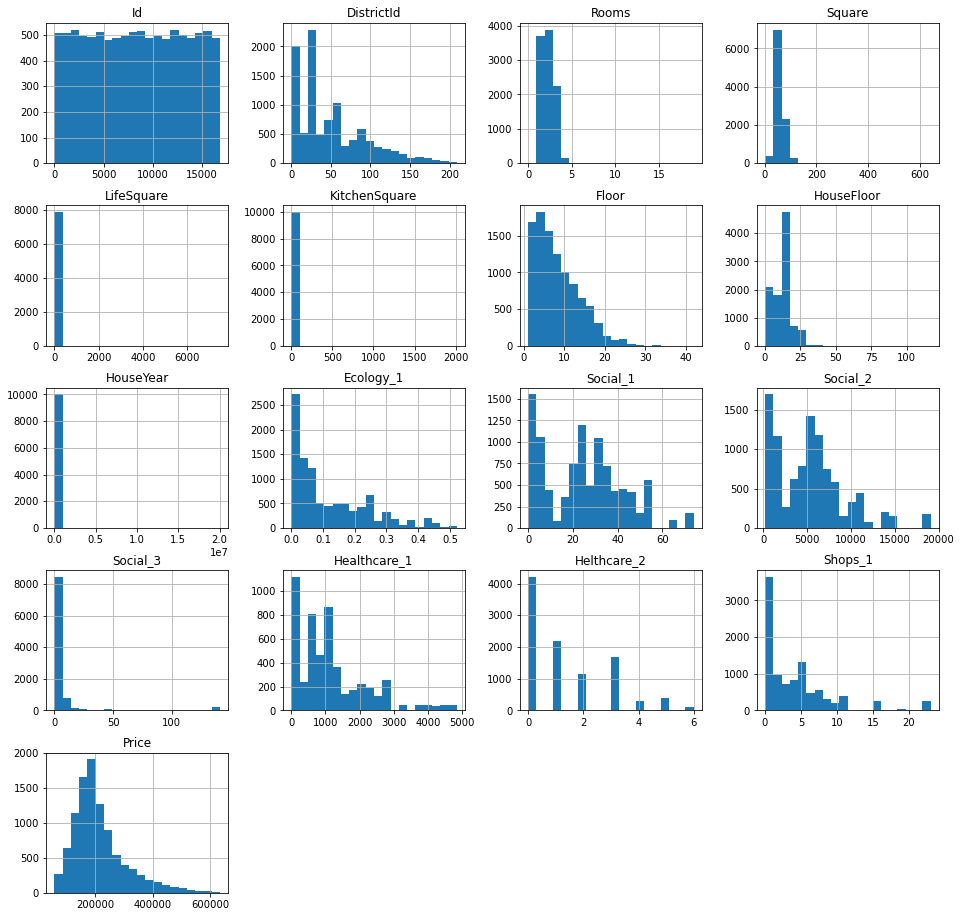

In [8]:
# Построение гистограмм распределения величин признаков

x.hist(figsize = (16, 16), bins = 20)

In [9]:
x['Id'].value_counts()

0       1
8817    1
2660    1
6758    1
4711    1
       ..
5408    1
7457    1
1314    1
3363    1
2047    1
Name: Id, Length: 10000, dtype: int64

In [10]:
x['Id'].value_counts().shape[0]

10000

Каждое значение признака "Id" уникально, поэтому на графике плотности все величины признака встречаются с одинаковой частотой.

In [11]:
x['DistrictId'].value_counts().head(20)

27    851
1     652
23    565
6     511
9     294
62    247
30    228
58    179
53    174
21    165
52    143
8     142
11    129
46    119
61    118
45    116
74    114
34    111
57    107
44    104
Name: DistrictId, dtype: int64

In [12]:
x['DistrictId'].value_counts().shape[0]

205

205 уникальных значений признака "DistrictId", значения встречаются неравномерно, мода занимает более 8,5%.

In [13]:
x['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
6.0        1
19.0       1
Name: Rooms, dtype: int64

In [14]:
x['Rooms'].value_counts().shape[0]

9

9 уникальных значений признака "Rooms", самые популярные занимают более 90%.

Значение 19 встречается всего один раз. Оно может оказаться ошибкой, если площадь и стоимость квартиры не будет соответствовать.

In [15]:
x['Square'].value_counts()

52.327165    1
34.785487    1
45.823093    1
57.607965    1
57.925603    1
            ..
60.776683    1
72.956943    1
51.770111    1
41.843220    1
64.226361    1
Name: Square, Length: 10000, dtype: int64

In [16]:
x['Square'].value_counts().shape[0]

10000

Каждое значение признака "Square" уникально, однако согласно гистограмме большиство значений < 120.

In [17]:
x['LifeSquare'].value_counts()

20.151696    1
28.241964    1
23.884805    1
51.826876    1
47.972602    1
            ..
45.455722    1
50.458505    1
42.172028    1
21.993610    1
27.598712    1
Name: LifeSquare, Length: 7887, dtype: int64

In [18]:
x['LifeSquare'].value_counts().shape[0]

7887

Каждое значение признака "LifeSquare" уникально, однако согласно гистограмме большиство значений < 60.

In [19]:
x['KitchenSquare'].value_counts().head(20)

1.0     2460
8.0     1306
5.0     1169
10.0    1075
6.0     1038
9.0      843
0.0      697
7.0      609
12.0     249
11.0     233
13.0      67
14.0      51
4.0       39
15.0      31
3.0       22
16.0      16
20.0      14
17.0      12
19.0      11
18.0       6
Name: KitchenSquare, dtype: int64

In [20]:
x['KitchenSquare'].value_counts().shape[0]

58

Всего 58 уникальных значений признака "KitchenSquare".

Большинство их них располагается в диапазоне от 1 до 12 включительно. Однако у почти 7% записей значение равно 0, что либо является ошибкой заполнения, либо не предполагает наличие кухни.

In [21]:
x['Floor'].value_counts()

4     949
5     876
3     872
6     802
7     759
8     643
9     604
2     588
10    553
11    457
12    438
13    398
14    362
16    290
15    287
17    256
1     235
18    185
19    121
20     68
21     59
22     54
24     53
25     34
23     25
26     18
27      5
28      3
32      2
42      1
37      1
33      1
31      1
Name: Floor, dtype: int64

In [22]:
x['Floor'].value_counts().shape[0]

33

Всего 33 уникальных значения признака "Floor".

Большинство значений располагаются в диапазоне от 1 до 20.

In [23]:
x['HouseFloor'].value_counts()

17.0     2331
9.0      1389
12.0     1074
5.0      1031
14.0      625
16.0      576
1.0       497
25.0      374
22.0      343
0.0       269
24.0      176
8.0       141
10.0      135
4.0       134
3.0       127
15.0      123
19.0      108
20.0      105
18.0       89
7.0        59
6.0        58
2.0        48
23.0       40
21.0       33
11.0       28
13.0       27
30.0       21
40.0        7
27.0        6
37.0        4
32.0        4
28.0        3
39.0        2
48.0        2
99.0        2
29.0        1
44.0        1
47.0        1
36.0        1
31.0        1
38.0        1
117.0       1
45.0        1
26.0        1
Name: HouseFloor, dtype: int64

In [24]:
x['HouseFloor'].value_counts().shape[0]

44

Всего 44 уникальных значений признака "HouseFloor".

Большинство значений располагаются в диапазоне от 1 до 20. Значения 117 и 99 могут быть ошибками заполнения данных.

In [25]:
x['HouseYear'].value_counts().head(20)

1977    2652
2017     308
2016     305
2015     299
2014     210
1970     194
1969     190
1972     178
1971     177
2018     175
1974     169
1968     162
1965     161
1963     158
1976     155
1964     150
1973     150
1975     150
1967     146
1966     140
Name: HouseYear, dtype: int64

In [26]:
x['HouseYear'].value_counts().tail(20)

1951        4
1940        4
1938        4
1919        3
1942        3
1936        3
1930        3
1917        3
1912        2
1941        2
1948        2
1932        2
1929        2
1910        1
1916        1
1928        1
1947        1
1914        1
4968        1
20052011    1
Name: HouseYear, dtype: int64

In [27]:
x['HouseYear'].value_counts().shape[0]

97

Всего 97 уникальных значений признака "HouseYear".

Большинство из них располагаются в интервале от 2017 до 1966. Некоторые единичные значения содержат ошибки.

In [28]:
x['Ecology_1'].value_counts()

0.007122    587
0.000000    537
0.243205    511
0.072158    486
0.075779    346
           ... 
0.386772      6
0.011320      3
0.394094      2
0.014334      1
0.012522      1
Name: Ecology_1, Length: 129, dtype: int64

In [29]:
x['Ecology_1'].value_counts().shape[0]

129

Всего 129 уникальных значений признака "Ecology_1".

Большинство из них располагаются в интервале от 0 до 0.25.

In [30]:
x['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

Всего 2 уникальных значения категориального признака "Ecology_2".

Более 99% из них равны "B".

С точки зрения оптимизации потребляемой памяти и обратки данных моделью, тип признака следует привести либо к бинарному, либо к dummy типу.

In [31]:
x['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

Всего 2 уникальных значения категориального признака "Ecology_3".

Более 97% из них равны "B".

С точки зрения оптимизации потребляемой памяти и обратки данных моделью, тип признака следует привести либо к бинарному, либо к dummy типу.

In [32]:
x['Social_1'].value_counts().head(20)

2     688
1     654
25    557
5     528
30    465
23    434
6     377
22    367
53    355
34    311
33    252
46    245
31    243
43    238
9     213
36    209
21    207
37    205
24    205
52    201
Name: Social_1, dtype: int64

In [33]:
x['Social_1'].value_counts().shape[0]

51

Всего 51 уникальное значение признака "Social_1".

In [34]:
x['Social_2'].value_counts().head(20)

264      587
1564     511
629      486
1437     346
6398     245
13670    204
5648     202
168      190
19083    176
1892     172
7065     163
14892    151
7759     148
469      142
915      141
5735     137
5212     128
10311    117
6207     110
8004     103
Name: Social_2, dtype: int64

In [35]:
x['Social_2'].value_counts().shape[0]

142

Всего 142 уникальных значений признака "Social_2".

In [36]:
x['Social_3'].value_counts()

0      2997
1      1861
3      1136
4       835
2       635
6       423
5       391
141     245
9       192
7       184
11      172
8       170
10      142
16      101
14       97
27       59
48       58
56       49
84       43
24       37
87       27
93       25
59       25
19       22
20       19
23       18
39       15
73       10
45        9
37        3
Name: Social_3, dtype: int64

In [37]:
x['Social_3'].value_counts().shape[0]

30

Всего 30 уникальных значений признака "Social_3", около 60% значений располагаются в интервале от 0 до 3.

In [38]:
x['Healthcare_1'].value_counts().head(20)

540.0     511
30.0      348
1046.0    245
750.0     163
229.0     148
2300.0    142
1084.0    137
240.0     127
1183.0    110
125.0     103
1322.0     99
645.0      99
1406.0     95
176.0      84
1548.0     83
1970.0     79
2672.0     79
1937.0     78
2078.0     76
990.0      75
Name: Healthcare_1, dtype: int64

In [39]:
x['Healthcare_1'].value_counts().shape[0]

79

Всего 79 уникальных значений признака "Healthcare_1", большинство значений располагаются в интервале от 0 до 540, остальные значения неравномерно распределены вплоть 4849.

In [40]:
x['Helthcare_2'].value_counts()

0    4214
1    2183
3    1670
2    1158
5     388
4     288
6      99
Name: Helthcare_2, dtype: int64

Всего семь уникальных значений признака "Helthcare_2", более 90% значений признака располагаются в интервале от 0 до 3.

##### Целочисленный тип данных признака, а также небольшой набор уникальных значений признака позволяют предположить, что он является категориальным.

In [41]:
x['Shops_1'].value_counts()

0     2316
1     1325
5     1324
2      964
4      841
3      711
6      487
11     401
9      316
7      294
8      253
23     245
10     215
15     176
16      83
19      49
Name: Shops_1, dtype: int64

In [42]:
x['Shops_1'].value_counts().shape[0]

16

Всего 16 уникальных значений признака "Shops_1", более 65% значений располагаются в интервале от 0 до 5, остальные значения неравномерно распределены вплоть 23.

In [43]:
x['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

Всего 2 уникальных значения категориального признака "Shops_2".

Более 91% из них равны "B".

С точки зрения оптимизации потребляемой памяти и обратки данных моделью, тип признака следует привести либо к бинарному, либо к dummy типу.

### 3. Построить график распределения целевой переменной. Сделать выводы.

In [44]:
target_mean = np.round(x['Price'].mean(), 2)
target_mean

214138.86

In [45]:
target_median = np.round(x['Price'].median(), 2)
target_median

192269.64

In [46]:
target_mode = np.round(x['Price'].mode()[0], 2)
target_mode

59174.78

<Figure size 1080x720 with 0 Axes>

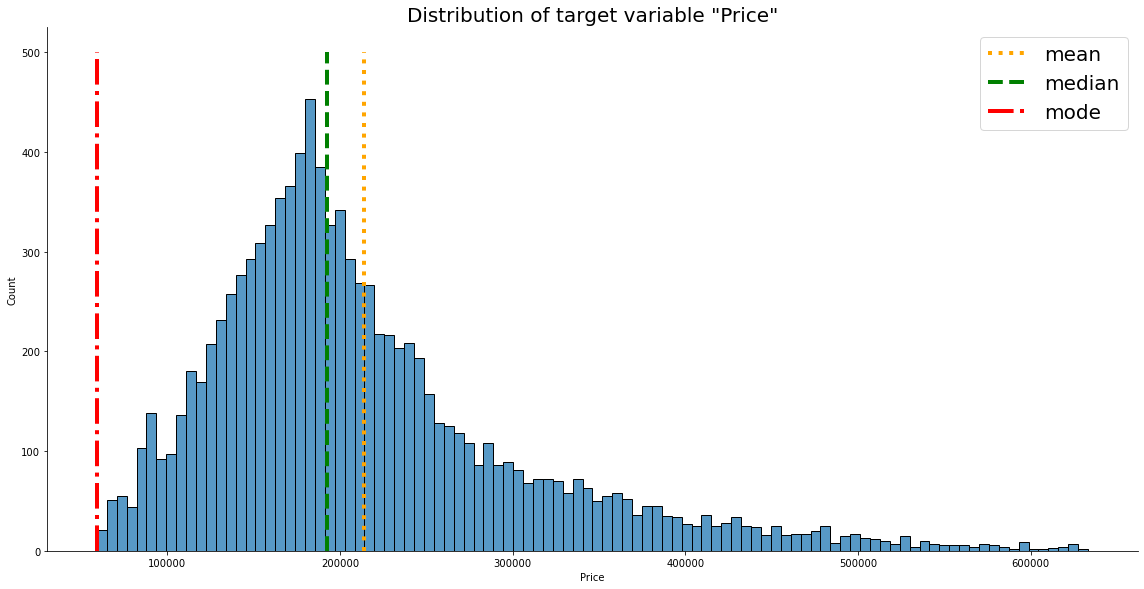

In [47]:
plt.figure(figsize = (15, 10))

sn.displot(data = x['Price'], bins = 100, height = 8, aspect = 2)

y = np.linspace(0, 500, 10)

plt.plot([target_mean] * 10, y, linewidth = 4, color = 'orange', linestyle = ':', label = 'mean')
plt.plot([target_median] * 10, y, linewidth = 4, color = 'green', linestyle = '--', label = 'median')
plt.plot([target_mode] * 10, y, linewidth = 4, color = 'red', linestyle = '-.', label = 'mode')

plt.legend(fontsize = 20)
plt.title('Distribution of target variable "Price"', fontsize = 20)

plt.show()

#### Выводы:

График распределения целевой переменной показывает, что большинство значений расположены в интервале от ~100000 до ~300000. Причём характер распределения значений внутри интервала напоминает нормальное распределение. Данное распределение с высокой вероятностью может адекватно отображать реальную стоимость жилья.

Часть значений в интервале от 400000 до ~633000 составляют около ~10% от всех данных. Данные значения могут быть подлинными, так как подобная стоимость приемлема для дорогого жилья. Однако, в целях проверки данных значений на предмет выбросов, следует оценить остальные признаки квартир в указанном ценовом диапазоне. Данный диапазон оказывает влияние на среднее значение всей выборки, увеличивая значение последней.

Диапазон значений от минимального ~60000 до первого квартиля ~150000, согласно визуальному анализу, также не содержит выбросов и может адекватно отображать реальную стоимость жилья. В целях проверки данных может быть произведён дополнительный анализ признаков квартир в данном ценовом диапазоне.

Мода целевого признака не отражает самое часто встречающееся значение, так как все значения уникальны и встречаются в выборке с одинаковой частотой. Таким образом, мода приняла значение первого значения в выборке по возрастанию, минимального значения.

    Среднее значение: 214138.86
    
    Медиана:          192269.64
    
    Мода:             59174.78


### 4. Построить гистограммы для наиболее проблемных признаков. Сделайте по ним выводы.

##### LifeSquare - жилая площадь

Основные проблемы данного признака следующие:

    1. Значительное количество пропусков, около ~21%.
    2. Наличие выбросов, которые помешают генерации качественных данных для заполнения пропусков.
    3. Данные денормализованы, каждое значение уникально.

<Figure size 1080x720 with 0 Axes>

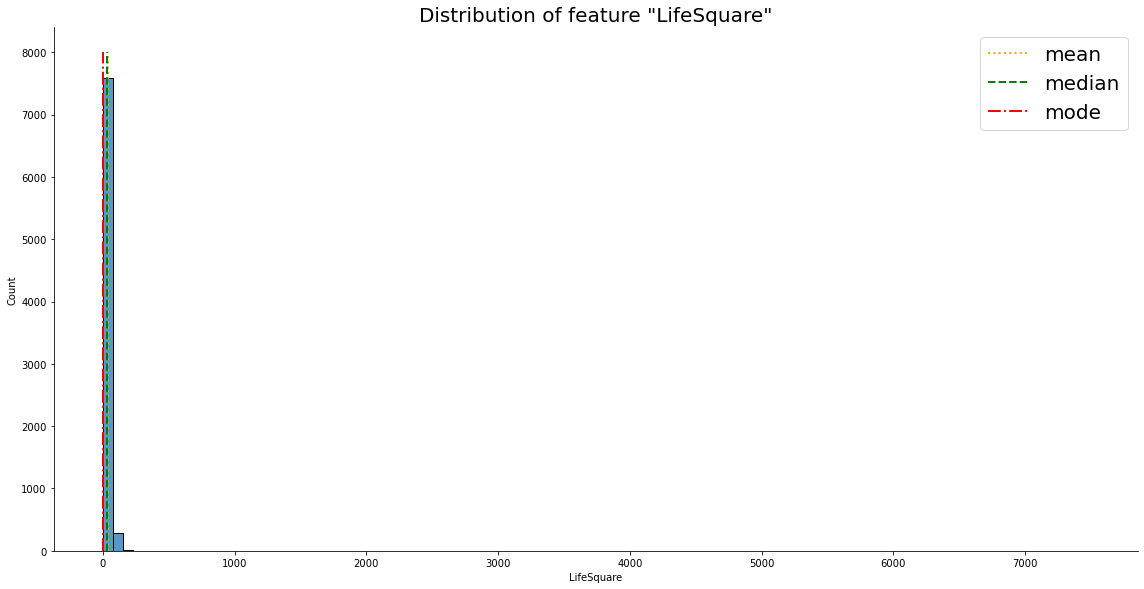

In [48]:
plt.figure(figsize = (15, 10))

sn.displot(data = x['LifeSquare'], bins = 100, height = 8, aspect = 2)

y = np.linspace(0, 8000, 10)

plt.plot([np.round(x['LifeSquare'].mean(), 2)] * 10, y, linewidth = 2, color = 'orange', linestyle = ':', label = 'mean')
plt.plot([np.round(x['LifeSquare'].median(), 2)] * 10, y, linewidth = 2, color = 'green', linestyle = '--', label = 'median')
plt.plot([np.round(x['LifeSquare'].mode()[0], 2)] * 10, y, linewidth = 2, color = 'red', linestyle = '-.', label = 'mode')

plt.legend(fontsize = 20)
plt.title('Distribution of feature "LifeSquare"', fontsize = 20)

plt.show()

Из-за наличия выбросов гистограмма обладаёт широким диапазоном значений по оси x, что делает визуальный анализ данных неэффективным. Для решения данной проблемы может быть применено масштабирование по десятичному логарифму.

<Figure size 1080x720 with 0 Axes>

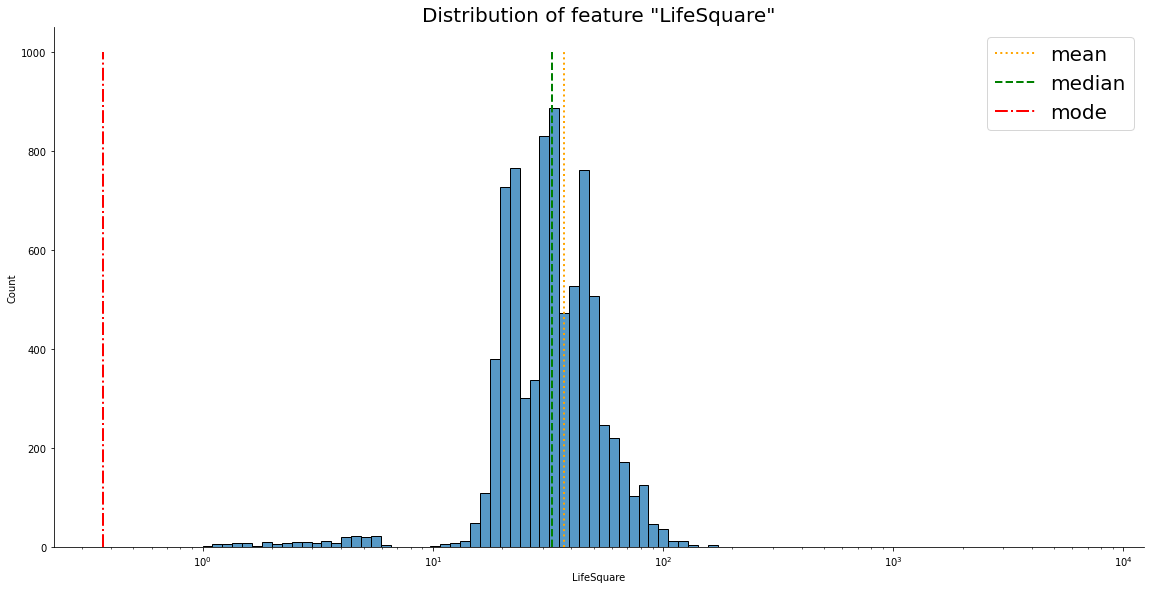

In [49]:
plt.figure(figsize = (15, 10))

sn.displot(data = x['LifeSquare'], bins = 100, height = 8, aspect = 2, log_scale = True)

y = np.linspace(0, 1000, 10)

plt.plot([np.round(x['LifeSquare'].mean(), 2)] * 10, y, linewidth = 2, color = 'orange', linestyle = ':', label = 'mean')
plt.plot([np.round(x['LifeSquare'].median(), 2)] * 10, y, linewidth = 2, color = 'green', linestyle = '--', label = 'median')
plt.plot([np.round(x['LifeSquare'].mode()[0], 2)] * 10, y, linewidth = 2, color = 'red', linestyle = '-.', label = 'mode')

plt.legend(fontsize = 20)
plt.title('Distribution of feature "LifeSquare"', fontsize = 20)

plt.show()

Данная гистограмма распределения значений признака "LifeSquare" демонстрирует, что большиство значений располагаются в пределах интервала от ~10 до ~100.

Значения менее 10 могут свидетельствовать о наличии ошибок, так как маловероятно наличия квартир с такой малой жилой площадью.

Значения более 200 также следует подвергнуть проверке для исключения выбросов.

In [50]:
x['LifeSquare'][x['LifeSquare'].notnull() == True].sort_values().tail(10)

8872     170.713651
5283     174.837082
1776     201.627361
7644     211.231125
1906     233.949309
357      263.542020
7010     410.639749
5183     461.463614
9229     638.163193
8000    7480.592129
Name: LifeSquare, dtype: float64

In [51]:
x['Square'].sort_values().tail(10)

2790    185.906396
8011    186.692602
1606    190.857689
9307    198.930182
1776    200.334539
7644    212.932361
1906    275.645284
7010    409.425181
726     604.705972
9229    641.065193
Name: Square, dtype: float64

Значение признака "LifeSquare" равного ~7480 в записи номер 8000 явно свидетельствует о наличие выброса.

Однако в записи номер 9229 признаки "Square" и "LifeSquare" равны ~641 и ~638 соответственно, что можно считать адеватными данными в случае жилья с большой площадью.

##### LifeSquare - жилая площадь, вывод:
Данный признак с большой вероятностью будет оказывать влияние на целевую переменную, поэтому его исключение не рекомендуется.

Данный признак содержит выбросы. Для обработки выбросов может использоваться диаграмма размаха "ящик с усами". Все значения определённые как ошибочные следует обработать для повышения точности прогнозирования модели.

Данный признак содержит пропуски. Также потребуется обработка пропусков.

#### Healthcare_1 - показатель местности, связанный с охраной здоровья

Основные проблемы данного признака следующие:

    1. Значительное количество пропусков, около ~48%.
    2. Неясная природа возникновения признака и как следствие, невозможность интерпретации и оценки адекватности данных.

<Figure size 1080x720 with 0 Axes>

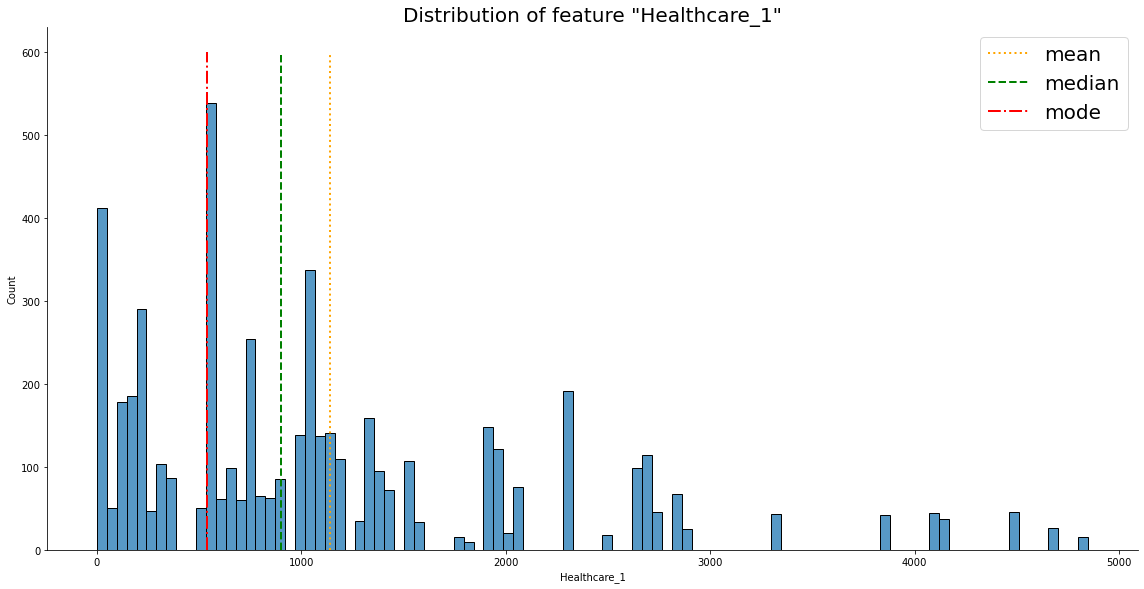

In [52]:
plt.figure(figsize = (15, 10))

sn.displot(data = x['Healthcare_1'], bins = 100, height = 8, aspect = 2)

y = np.linspace(0, 600, 10)

plt.plot([np.round(x['Healthcare_1'].mean(), 2)] * 10, y, linewidth = 2, color = 'orange', linestyle = ':', label = 'mean')
plt.plot([np.round(x['Healthcare_1'].median(), 2)] * 10, y, linewidth = 2, color = 'green', linestyle = '--', label = 'median')
plt.plot([np.round(x['Healthcare_1'].mode()[0], 2)] * 10, y, linewidth = 2, color = 'red', linestyle = '-.', label = 'mode')

plt.legend(fontsize = 20)
plt.title('Distribution of feature "Healthcare_1"', fontsize = 20)

plt.show()

##### Healthcare_1 - показатель местности, связанный с охраной здоровья, вывод:
Природа распределения значений признака неизвеста. Таким образом невозможна интерпритация признака, например, какое из значений 1000 или 2000 является лучшей характеристикой квартиры. В следствии чего невозможна оценка адекватности данных выборки этого признака, а также генерация отсутствующих значений.

Всё вышеописанное, а также наличие признака "Helthcare_2", который косвенно отражает схожую характеристику жилья, дают основание для исключения данного признака "Healthcare_1" из списка признаков, оказывающих адекватное влияние на целевую переменную.

##### Признак "Healthcare_1" рекомендуется исключить из дальнейшего рассмотрения.

#### KitchenSquare - площадь кухни

Основные проблемы данного признака следующие:

    1. Наличие выбросов.

<Figure size 1080x720 with 0 Axes>

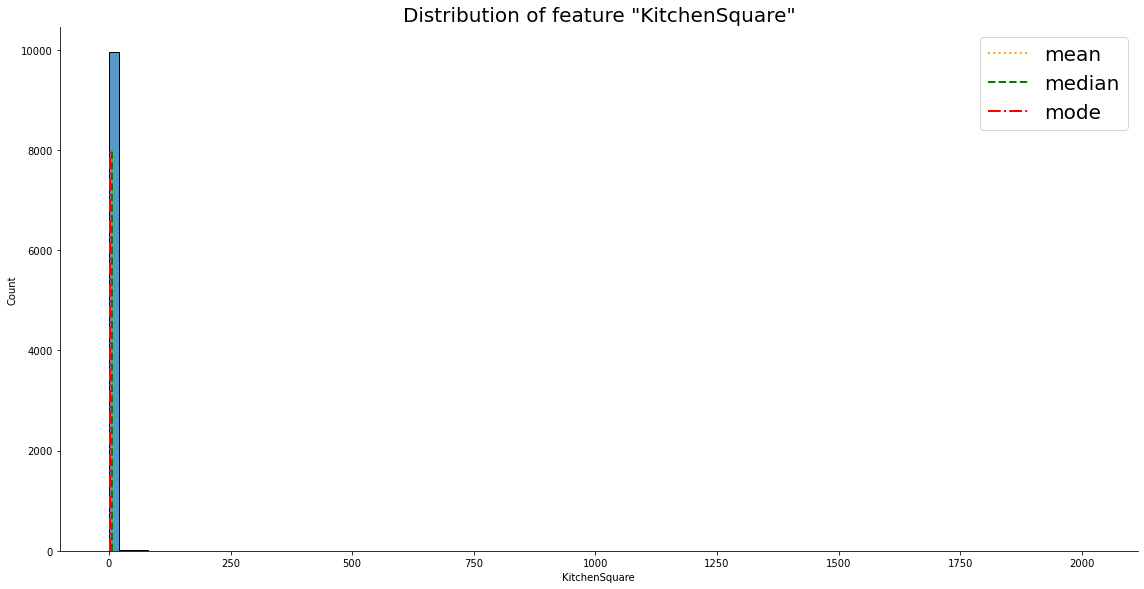

In [53]:
plt.figure(figsize = (15, 10))

sn.displot(data = x['KitchenSquare'], bins = 100, height = 8, aspect = 2)

y = np.linspace(0, 8000, 10)

plt.plot([np.round(x['KitchenSquare'].mean(), 2)] * 10, y, linewidth = 2, color = 'orange', linestyle = ':', label = 'mean')
plt.plot([np.round(x['KitchenSquare'].median(), 2)] * 10, y, linewidth = 2, color = 'green', linestyle = '--', label = 'median')
plt.plot([np.round(x['KitchenSquare'].mode()[0], 2)] * 10, y, linewidth = 2, color = 'red', linestyle = '-.', label = 'mode')

plt.legend(fontsize = 20)
plt.title('Distribution of feature "KitchenSquare"', fontsize = 20)

plt.show()

In [54]:
x['KitchenSquare'].sort_values().tail(10)

5273      73.0
3956      75.0
2831      78.0
2785      84.0
2454      96.0
7733     112.0
5002     112.0
286      123.0
6505    1970.0
9520    2014.0
Name: KitchenSquare, dtype: float64

Из-за наличия выбросов гистограмма обладаёт широким диапазоном значений по оси x, что делает визуальный анализ данных неэффективным. Для решения данной проблемы может быть применено масштабирование по десятичному логарифму.

Для применения масштабирования по десятичному логарифму необходимо обработать значения равные 0.

In [60]:
x_ks = x['KitchenSquare'].copy()

In [62]:
x_ks[x_ks == 0] = 0.01

In [63]:
x['KitchenSquare'][x['KitchenSquare'] == 0].shape

(697,)

In [64]:
x_ks[x_ks == 0.01].shape

(697,)

<Figure size 1080x720 with 0 Axes>

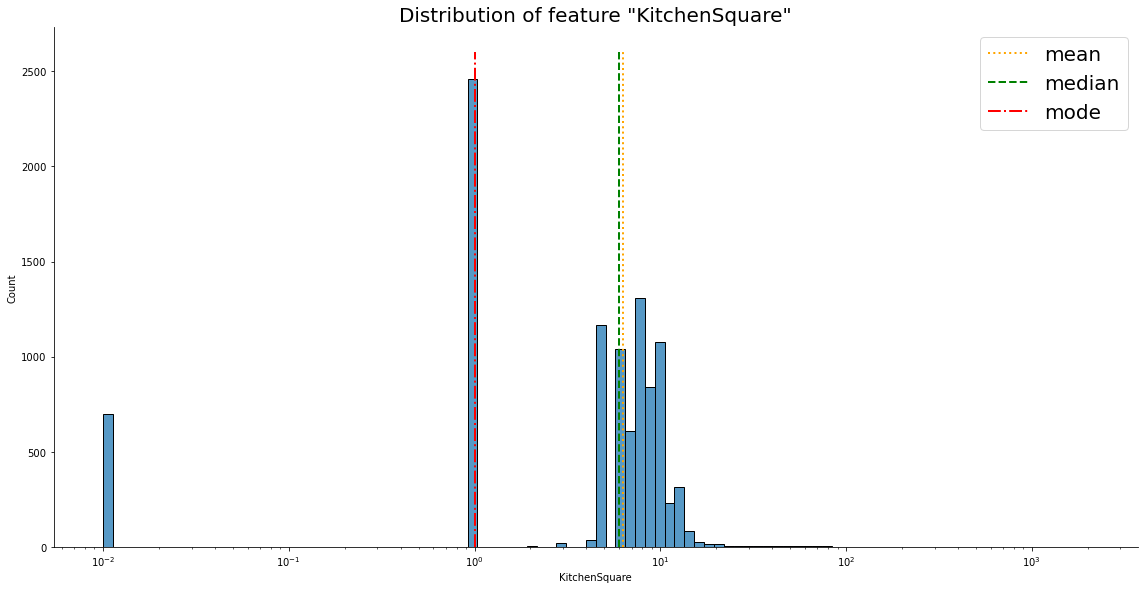

In [68]:
plt.figure(figsize = (15, 10))

sn.displot(data = x_ks, bins = 100, height = 8, aspect = 2, log_scale = True)

y = np.linspace(0, 2600, 10)

plt.plot([np.round(x_ks.mean(), 2)] * 10, y, linewidth = 2, color = 'orange', linestyle = ':', label = 'mean')
plt.plot([np.round(x_ks.median(), 2)] * 10, y, linewidth = 2, color = 'green', linestyle = '--', label = 'median')
plt.plot([np.round(x_ks.mode()[0], 2)] * 10, y, linewidth = 2, color = 'red', linestyle = '-.', label = 'mode')

plt.legend(fontsize = 20)
plt.title('Distribution of feature "KitchenSquare"', fontsize = 20)

plt.show()

Данная гистограмма распределения значений признака "KitchenSquare" демонстрирует, что большиство значений располагаются в пределах интервала от ~1 до ~10.

Однако большое количество значений 1, около четверти от всей выборки, может свидетельствовать о некорректности заполнения данных, так как маловероятно наличии кухонь с площадью равной одному квадратному метру. Данные значения потребуют проверки и обработки.

Околонулевые значения, а также значения превышающие медиану на несколько порядков с высокой степенью веоятности также можно отнести к выбросам. Данные значения потребуют проверки и обработки.

#### KitchenSquare - площадь кухни, вывод:
Данный признак с большой вероятностью будет оказывать влияние на целевую переменную, поэтому его исключение не рекомендуется.

Данный признак содержит выбросы. Для обработки выбросов может использоваться диаграмма размаха "ящик с усами". Все значения определённые как ошибочные следует обработать для повышения точности прогнозирования модели.

### 5. Построить матрицу корреляций признаков и целевой переменной. Сделайте выводы.

In [82]:
x_corr = x
x_corr = x_corr.drop(columns = ['Id'])
x_corr = x_corr.corr()
x_corr = np.round(x_corr, 2)
x_corr[np.abs(x_corr) < 0.25] = 0

x_corr

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
DistrictId,1.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.25,0.00,0.00,0.3,0.31,0.00,0.27
Rooms,0.00,1.00,0.66,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.55
Square,0.00,0.66,1.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.52
LifeSquare,0.00,0.00,0.00,1.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00
KitchenSquare,0.00,0.00,0.00,0.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00
Floor,0.00,0.00,0.00,0.0,0.0,1.00,0.42,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00
HouseFloor,0.00,0.00,0.00,0.0,0.0,0.42,1.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00
HouseYear,0.00,0.00,0.00,0.0,0.0,0.00,0.00,1.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00
Ecology_1,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,1.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00
Social_1,0.25,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,1.00,0.96,0.00,0.0,0.52,0.53,0.26


<AxesSubplot:>

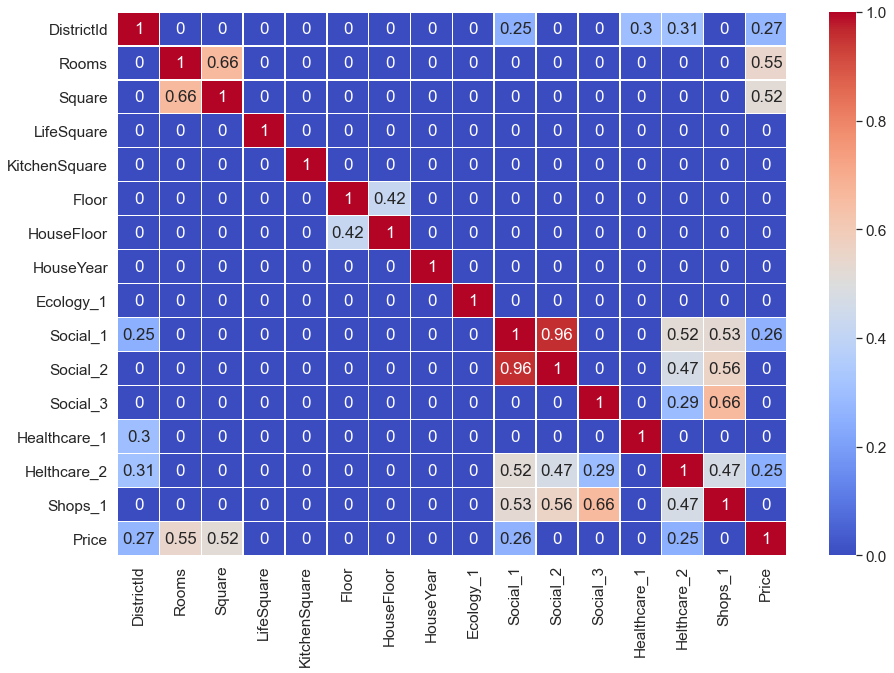

In [83]:
plt.figure(figsize = (15, 10))

sn.set(font_scale = 1.4)

sn.heatmap(data = x_corr, annot = True, cmap = 'coolwarm', linewidth = 0.5)

#### Выводы:

Наибольшее линейное влияние на целевую переменную оказывают признаки "Rooms" и "Square" с коэффициентами корреляции 0.55 и 0.52 соответственно. Данная зависимость адекватна, так как метраж жилплощади и количество комнат часто напрямую связанны со стоимостью жилья.

Следующие признаки "DistrictId", "Social_1", "Helthcare_2" оказывают меньшее линейное влияние на целевую переменную с коэффициентами корреляции 0.27, 0.26, 0.25 соответственно. Данные зависимости также выглядят адекватными, так как район расположения жилья, социальная обустроенность и медицинское обеспечение в действительности могут оказывать слияние на стоимость жилья.

Однако следующие признаки "LifeSquare", "KitchenSquare", "Floor", "HouseFloor", "HouseYear", "Ecology_1", "Social_2", "Social_3", "Healthcare_1", "Shops_1" продемонстрировали пренебрежительно малое линейное влияние, коэффициенты корреляции менее 0.25, на целевую переменную. Данный факт может быть обусловлен тем, что перечисленные признаки могут оказывать нелинейное влияние на целевую переменную.

Наиболее аккуратно следует проводить предобработку данных у признаков "Rooms" и "Square", так как они критически влияют на формирование искомой величины.